I decided to review article Kjærgaard J, Stensballe LG, Birk NM, et al. Lack of a Negative Effect of BCG-Vaccination on Child Psychomotor Development: Results from the Danish Calmette Study - A Randomised Clinical Trial. PLoS One. 2016;11(4):e0154541. Published 2016 Apr 28. doi:10.1371/journal.pone.0154541. In this paper researchears tried to assess the non-specific effect of Bacillus Calmette-Guérin (BCG) vaccination at birth on psychomotor development of children. The samples were collected in maternity units and pediatric wards at three university hospitals in Denmark. Randomization was stratified by pre-maturity (gestational age [GA] < 37 weeks or ≥ 37 weeks) and children were allocated 1:1 in permuting blocks of 2-4-6 using an online system.

Firstly i tried to make synthetic data according to table 1. I focused only for participants who filled out the entire questionnaire (not partialy or non-responders). Original distribution between control and BCG group is 1647 for control group and 1779 responders for BCG group. My set consist from 10000 responders (5000 control and 5000 BCG group).

In [1]:
# import libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random, uuid
from scipy.stats import mannwhitneyu
from matplotlib import pyplot
import math

Distribution in table 1 is represtened mostly in percentage. So i made function for generating data based on percentages.

In [2]:
# generate data based on percentage distribution
def feat_gen(percentage, data: pd.DataFrame, col_name: str):
    dis = [True] * int((percentage * len(data)) / 100) + [False] * int((len(data) - int((percentage * len(data)) / 100)))
    random.shuffle(dis)
    result = pd.DataFrame(dis, columns = [col_name])
    
    return result

Now i can generate patient population with selected features: population size, age, smoking, premature birth, sex, older biological siblings and multiple births

In [3]:
# function for generating mothers population
def create_patient_population(sample_size: float,age_loc: float, age_scale: float, BCG_loc: float, BCG_scale: float, c_smoke: float, b_smoke: float,
                             c_premature: float, b_premature: float, c_sex: float, b_sex: float, c_siblings: float, b_siblings: float, c_multiple: float,
                             b_multiple: float):
    # population size
    population_control = pd.DataFrame(index=np.arange(int(sample_size/2)))
    population_control.set_index([['control']*len(population_control)], inplace=True)
    population_BCG = pd.DataFrame(index=np.arange(int(sample_size/2)))
    population_BCG.set_index([['BCG']*len(population_BCG)], inplace=True)
    
    control = population_control.reset_index()
    BCG = population_BCG.reset_index()
    
    # generate age from normal distribution
    age_control = np.random.normal(loc = age_loc, scale = age_scale, size = int(sample_size/2)).astype(float)
    age_control_df = pd.DataFrame(age_control, columns = ['age'])
    age_BCG = np.random.normal(loc = BCG_loc, scale = BCG_scale, size = int(sample_size/2)).astype(float)
    age_BCG_df = pd.DataFrame(age_BCG, columns = ['age'])
    
    # generate fetures based on table 1 percentage with function feat_gen
    con_smoke = feat_gen(c_smoke,control,'smoke')
    bcg_smoke = feat_gen(b_smoke,BCG,'smoke')
    
    con_premature = feat_gen(c_premature,control,'premature')
    bcg_premature = feat_gen(b_premature,BCG,'premature')
    
    con_sex = feat_gen(c_sex,control,'sex')
    bcg_sex = feat_gen(b_sex,BCG,'sex')
    
    con_siblings = feat_gen(c_siblings,control,'siblings')
    bcg_siblings = feat_gen(b_siblings,BCG,'siblings')
    
    con_multiple = feat_gen(c_multiple,control,'multiple')
    bcg_multiple = feat_gen(b_multiple,BCG,'multiple')
    
    dfs_control = [control, age_control_df, con_smoke, con_premature, con_sex, con_siblings, con_multiple]
    control_fin = dfs_control[0].join(dfs_control[1:])
    
    # features for groups together
    dfs_BCG = [BCG, age_BCG_df, bcg_smoke, bcg_premature, bcg_sex, bcg_siblings, bcg_multiple]
    BCG_fin = dfs_BCG[0].join(dfs_BCG[1:])
    
    # concat groups
    final_df = pd.concat([control_fin, BCG_fin], axis=0).reset_index(drop = True)
    
    return final_df

In [4]:
# data based on table 1
sample_size = 10000
c_age_loc = 31.6
c_age_scale = 4.3
b_age_loc = 31.6
b_age_scale = 4.5
c_smoke = 9.3
b_smoke = 9.4
c_premature = 3.5
b_premature = 3.2
c_sex = 53.1
b_sex = 52.2
c_siblings = 39.7 
b_siblings = 40.9
c_multiple = 3.7
b_multiple = 3

In [5]:
# generate population
population = create_patient_population(sample_size, c_age_loc, c_age_scale, b_age_loc, b_age_scale, c_smoke, b_smoke, 
                              c_premature, b_premature, c_sex, b_sex, c_siblings, b_siblings, c_multiple, b_multiple)
population

,index,age,smoke,premature,sex,siblings,multiple
0,control,31.557752,False,False,True,True,False
1,control,25.057687,False,False,False,False,True
2,control,33.321448,False,False,True,True,False
3,control,35.037117,False,True,True,True,False
4,control,36.864770,False,False,True,False,False
...,...,...,...,...,...,...,...
9995,BCG,42.995176,False,False,True,True,False
9996,BCG,38.251725,False,False,False,True,False
9997,BCG,36.881350,False,False,True,False,False
9998,BCG,40.814282,False,False,False,False,False


In table 1 is also information about education level so I add this. Function is based on percentage fractions, like in table 1

In [6]:
# function
def generate_school(group_size: int, fracs:list, random_state:int=42):
    
    # empty df with defined nuber of rows
    df = pd.DataFrame(index=range(group_size))
    
    # generate education based on fractions
    remain = df.index.copy().to_frame()
    res = []
    for i in range(len(fracs)):
        fractions_sum=sum(fracs[i:])
        frac = fracs[i]/fractions_sum
        idxs = remain.sample(frac=frac, random_state=random_state).index
        remain=remain.drop(idxs)
        res.append(idxs)
        
    samples = [df.loc[idxs] for idxs in res]
    basic = samples[0].index = ['Basic schooling and non-theoretical education'] * len(samples[0])
    basic = pd.DataFrame(basic, columns = ['school'])
    BA = samples[1].index = ['Theoretical education incl. BA level'] * len(samples[1])
    BA = pd.DataFrame(BA, columns = ['school'])
    master = samples[2].index = ['Master level or more'] * len(samples[2])
    master = pd.DataFrame(master, columns = ['school'])
    
    final_df = pd.concat([basic, BA, master], axis=0).reset_index(drop = True)
    
    return final_df

In [7]:
# generate education
control_school = generate_school(5000, [0.196,0.444,0.36])
BCG_school = generate_school(5000, [0.206,0.445,0.349])

# concat tables
school = pd.concat([control_school, BCG_school], axis=0).reset_index(drop = True)

In [8]:
# add education level to population table
population_2 = pd.concat([population, school], axis=1)
population_2

,index,age,smoke,premature,sex,siblings,multiple,school
0,control,31.557752,False,False,True,True,False,Basic schooling and non-theoretical education
1,control,25.057687,False,False,False,False,True,Basic schooling and non-theoretical education
2,control,33.321448,False,False,True,True,False,Basic schooling and non-theoretical education
3,control,35.037117,False,True,True,True,False,Basic schooling and non-theoretical education
4,control,36.864770,False,False,True,False,False,Basic schooling and non-theoretical education
...,...,...,...,...,...,...,...,...
9995,BCG,42.995176,False,False,True,True,False,Master level or more
9996,BCG,38.251725,False,False,False,True,False,Master level or more
9997,BCG,36.881350,False,False,True,False,False,Master level or more
9998,BCG,40.814282,False,False,False,False,False,Master level or more


I have artificial population so I can generate their ASQ score. I work with Table 2 - Mean ASQ score

In [9]:
#Function for generating ASQ score based on Table2 (mean and sd)
def gen_score(pop_size: int, com_loc: float, com_scale: float, fin_loc: float, fin_scale: float, gross_loc: float, gross_scale: float, problem_loc:float,
              problem_scale: float, person_loc: float, person_scale):
    
    # generate ASQ score from normal distribution
    Communication = np.random.normal(loc = com_loc, scale = com_scale, size = pop_size).astype(int)
    Fine_motor = np.random.normal(loc = fin_loc, scale = fin_scale, size = pop_size).astype(int)
    Gross_motor = np.random.normal(loc = gross_loc, scale = gross_scale, size = pop_size).astype(int)
    Problem_solving = np.random.normal(loc = problem_loc, scale = problem_scale, size = pop_size).astype(int)
    Personal_social = np.random.normal(loc = person_loc, scale = person_scale, size = pop_size).astype(int)
    
    # convert numpy to df
    df1 = pd.DataFrame(Communication, columns = ['Communication'])
    df2 = pd.DataFrame(Fine_motor, columns = ['Fine_motor'])
    df3 = pd.DataFrame(Gross_motor, columns = ['Gross_motor'])
    df4 = pd.DataFrame(Problem_solving, columns = ['Problem_solving'])
    df5 = pd.DataFrame(Personal_social, columns = ['Personal_social'])
    
    # concat dfs
    df_all = pd.concat([df1, df2, df3, df4, df5], axis=1, join='inner')

    return df_all

In [10]:
# CONTROL GROUP ASQ score (table 2)
pop_size = int(sample_size/2)

com_loc = 29.7
com_scale = 13.3

fin_loc = 38.0
fin_scale = 19.2

gross_loc = 38.7
gross_scale = 12.7

problem_loc = 36.7
problem_scale = 14.1

person_loc = 36.7
person_scale = 13.3

In [11]:
# use function - control group
control_score = gen_score(pop_size, com_loc, com_scale, fin_loc, fin_scale, gross_loc, gross_scale, problem_loc,
                    problem_scale, person_loc, person_scale)

In [12]:
# BCG GROUP ASQ score (table 2)
pop_size = int(sample_size/2)

com_loc = 29.2
com_scale = 13.1

fin_loc = 37.8
fin_scale = 19.2

gross_loc = 38.2
gross_scale = 12.6

problem_loc = 36.6
problem_scale = 13.6

person_loc = 36.2
person_scale = 13.3

In [13]:
# use function - BCG group
BCG_score = gen_score(pop_size, com_loc, com_scale, fin_loc, fin_scale, gross_loc, gross_scale, problem_loc,
                    problem_scale, person_loc, person_scale)

In [14]:
# concat score for both groups
score = pd.concat([control_score, BCG_score], axis=0).reset_index(drop = True)
score

,Communication,Fine_motor,Gross_motor,Problem_solving,Personal_social
0,32,52,56,32,47
1,15,61,47,28,42
2,28,31,45,39,47
3,36,31,53,21,56
4,11,31,33,39,42
...,...,...,...,...,...
9995,51,30,23,48,26
9996,46,70,57,35,55
9997,32,18,52,23,59
9998,45,13,29,51,32


In [15]:
# add score to table with population data
population_3 = pd.concat([population_2, score], axis=1)
population_3

,index,age,smoke,premature,sex,siblings,multiple,school,Communication,Fine_motor,Gross_motor,Problem_solving,Personal_social
0,control,31.557752,False,False,True,True,False,Basic schooling and non-theoretical education,32,52,56,32,47
1,control,25.057687,False,False,False,False,True,Basic schooling and non-theoretical education,15,61,47,28,42
2,control,33.321448,False,False,True,True,False,Basic schooling and non-theoretical education,28,31,45,39,47
3,control,35.037117,False,True,True,True,False,Basic schooling and non-theoretical education,36,31,53,21,56
4,control,36.864770,False,False,True,False,False,Basic schooling and non-theoretical education,11,31,33,39,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,BCG,42.995176,False,False,True,True,False,Master level or more,51,30,23,48,26
9996,BCG,38.251725,False,False,False,True,False,Master level or more,46,70,57,35,55
9997,BCG,36.881350,False,False,True,False,False,Master level or more,32,18,52,23,59
9998,BCG,40.814282,False,False,False,False,False,Master level or more,45,13,29,51,32


In [16]:
# Now i can calculate mean score for each subgroup of questions and mean SUM ASQ score

In [17]:
# function for calculating mean, sum and sd
def ASQ_score_means(ASQ_score: pd.DataFrame):
    
    # sum ASQ score
    summary = ASQ_score.sum(1)
    
    # mean score
    mean = summary.mean()
    mean_frame = pd.DataFrame([mean], columns = ["ASQ_score_mean"])
    
    # standard deviation
    sd = summary.std()
    sd_frame = pd.DataFrame([sd], columns = ["ASQ_score_std"])
    
    # to df
    summary2 = ASQ_score.mean().to_frame('ASQ_score_mean')
    
    summary2_sd = ASQ_score.std().to_frame('ASQ_score_std')
    
    # concat 
    df_all = pd.concat([mean_frame, sd_frame, summary2, summary2_sd], axis=1)
    df_all = df_all.fillna(0)
    df_all2 = df_all.groupby(lambda x:x, axis=1).sum().rename(index={0: 'sum'})
    
    return df_all2

In [18]:
# score - control group
fin_score_control = ASQ_score_means(control_score)
fin_score_control

,ASQ_score_mean,ASQ_score_std
sum,177.7228,33.046367
Communication,28.8926,13.472452
Fine_motor,37.7380,19.045364
Gross_motor,38.2864,12.801592
Problem_solving,36.2954,13.985352
Personal_social,36.5104,13.403157


In [19]:
# score - BCG group
fin_score_BCG = ASQ_score_means(BCG_score)
fin_score_BCG

,ASQ_score_mean,ASQ_score_std
sum,175.9362,32.644118
Communication,29.1678,13.000009
Fine_motor,37.1996,19.147112
Gross_motor,38.1682,12.512331
Problem_solving,35.8478,13.336544
Personal_social,35.5528,13.298277


As you can see means are relativelly simillar between control and BCG groups. They are also close to score values in paper - Table 2. I want to see distributions and calcuate p value. I used Mann-Whitney U test, where H0 tells the both samples comes from same distribution.

In [20]:
# I decided to generate new data based on ASQ sum mean and sd. First i select loc and scale values from generated tables.

# mean and sd 
loc_ct = fin_score_control.iloc[0:1,0:1].to_numpy().reshape(1)
scale_ct = fin_score_control.iloc[0:1,1:2].to_numpy().reshape(1)

loc_BCG = fin_score_BCG.iloc[0:1,0:1].to_numpy().reshape(1)
scale_BCG = fin_score_BCG.iloc[0:1,1:2].to_numpy().reshape(1)

# generate sum score from normal distribution
control_sum = np.random.normal(loc= loc_ct, scale = scale_ct, size=5000).astype(int)
BCG_sum = np.random.normal(loc= loc_BCG, scale= scale_BCG, size=5000).astype(int)

In [21]:
# optimalization of bins size
bins_control = np.histogram_bin_edges(control_sum, bins='auto', range=(control_sum.min(), control_sum.max()))
bins_BCG = np.histogram_bin_edges(BCG_sum, bins='auto', range=(BCG_sum.min(), BCG_sum.max()))

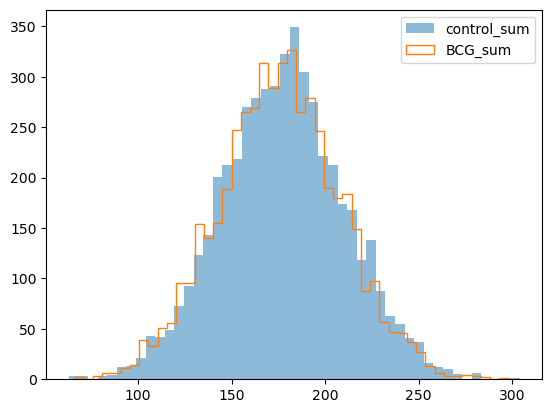

In [22]:
# histogram of distributions
pyplot.hist(control_sum, bins = bins_control, alpha=0.5, label='control_sum')
pyplot.hist(BCG_sum, bins = bins_BCG, alpha=1, label='BCG_sum', histtype=u'step')
pyplot.legend(loc='upper right')
pyplot.show()

In [23]:
# p value
U1, p = mannwhitneyu(control_sum, BCG_sum)
p

0.006161525142376038

p value is <0.01, so we can reject H0 hypothesis which means, samples comes from two different distributions.

#### Data from paper are collected at three university hospitals in Denmark. Now I split my artificial data set randomly to 3 subsets. And use only fraction of data from all 3 sets. Let's say 20%. In reality it can be economic nonsense and waste of precious data, but I want to see how big can be effect of this.

In [24]:
# split data randomly to 3 subsets
ppp = population_3.set_index('index')

# split to groups
p_con = ppp.loc['control']
p_BCG = ppp.loc['BCG']

# shuffle
shuffled_con = p_con.sample(frac=1)
shuffled_BCG = p_BCG.sample(frac=1)

# split
result_con = np.array_split(shuffled_con, 3)
result_BCG = np.array_split(shuffled_BCG, 3)

In [25]:
# define fraction of subsets which we want to use 
def frac(df_list: list, fraction: float):
    lst = []
    for DataFrame in df_list:
        df_percent = DataFrame.sample(frac = fraction)
        lst.append(df_percent)

    select = pd.concat(lst)
    
    return select

In [26]:
# select let's say 20% from each subset
select_control = frac(result_con, 0.2)
select_BCG = frac(result_BCG, 0.2)

Now, I will test distributions of several features which represent mothers 

#### age

In [27]:
# select age values
age_control = select_control.iloc[:,0:1].to_numpy().reshape(999)
age_BCG = select_BCG.iloc[:,0:1].to_numpy().reshape(999)

In [28]:
# bins optimization
bins_control_age = np.histogram_bin_edges(age_control, bins='auto', range=(age_control.min(), age_control.max()))
bins_BCG_age = np.histogram_bin_edges(age_BCG, bins='auto', range=(age_BCG.min(), age_BCG.max()))

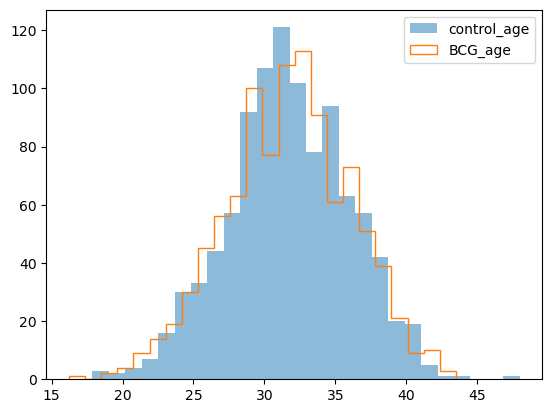

In [29]:
# plot data
pyplot.hist(age_control, bins = bins_control_age, alpha=0.5, label='control_age')
pyplot.hist(age_BCG, bins = bins_BCG_age, alpha=1, label='BCG_age', histtype=u'step')
pyplot.legend(loc='upper right')
pyplot.show()

In [30]:
# p value
U1, p = mannwhitneyu(age_control, age_BCG)
p

0.8683017529875808

H0 can't be rejected so both groups (control and BCG) are represented by mothers with same age distribution

#### Now i want to see few binary stats from table 1:  smoking, premature birth, sex, older biological siblings and multiple births

In [31]:
# select binary stats
control_bin = select_control.iloc[:,1:6]
BCG_bin = select_BCG.iloc[:,1:6]
length = len(BCG_bin.index)

In [32]:
# function for calculating percentage distribution
def binary_stats(dataframe: pd.DataFrame, length:int, group_name: str):
    
    # proportion of true values in set
    stats = []
    for columns in dataframe:
        data = (100 / length) * dataframe[columns].sum()
        stats.append(data)
    
    stats_group = pd.DataFrame(stats)

    BCG_bin_stats = pd.DataFrame(data=stats_group.T.values, columns=dataframe.columns).T.rename(columns={0: group_name})
    
    return BCG_bin_stats

In [33]:
# use function
control_bin_stats = binary_stats(control_bin, length, 'control')
BCG_bin_stats = binary_stats(BCG_bin, length, 'BCG')

stats = pd.concat([control_bin_stats, BCG_bin_stats], axis=1)
stats

,control,BCG
smoke,10.010010,9.509510
premature,2.802803,3.203203
sex,53.953954,55.655656
siblings,38.738739,40.140140
multiple,3.503504,2.502503


Expect smoking, all other features follow original data representation from (paper: table 1)

#### ASQ score

In [34]:
# select score data
score_control_sel = select_control.iloc[:,7:]
score_BCG_sel = select_BCG.iloc[:,7:]

In [35]:
# calculate means, sd and SUM ASQ score
fin_score_control_sel = ASQ_score_means(score_control_sel)
fin_score_BCG_sel = ASQ_score_means(score_BCG_sel)

In [36]:
# select loc and scale for both, control and BCG group
loc_ct_sele = fin_score_control_sel.iloc[0:1,0:1].to_numpy().reshape(1)
scale_ct_sele = fin_score_control_sel.iloc[0:1,1:2].to_numpy().reshape(1)

loc_BCG_sele = fin_score_BCG_sel.iloc[0:1,0:1].to_numpy().reshape(1)
scale_BCG_sele = fin_score_BCG_sel.iloc[0:1,1:2].to_numpy().reshape(1)

In [37]:
# generate new dataset based based on normal distribution and examined loc and scale values
control_sele_sum = np.random.normal(loc = loc_ct_sele, scale = scale_ct_sele, size=5000).astype(int)
BCG_sele_sum = np.random.normal(loc= loc_BCG_sele, scale = scale_BCG_sele, size=5000).astype(int)

In [38]:
# bin value optimization
bins_control_sele = np.histogram_bin_edges(control_sele_sum, bins='auto', range=(control_sele_sum.min(), control_sele_sum.max()))
bins_BCG_sele = np.histogram_bin_edges(BCG_sele_sum, bins='auto', range=(BCG_sele_sum.min(), BCG_sele_sum.max()))

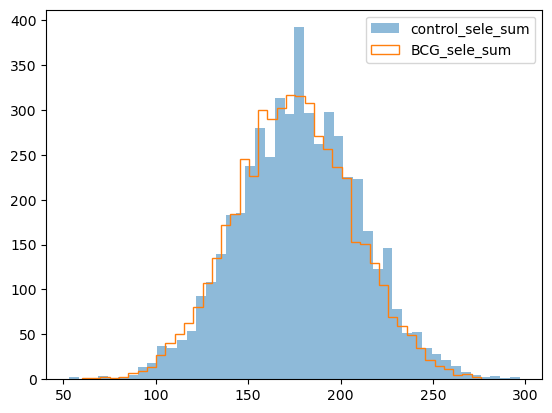

In [39]:
pyplot.hist(control_sele_sum, bins = bins_control_sele, alpha=0.5, label='control_sele_sum')
pyplot.hist(BCG_sele_sum, bins = bins_BCG_sele, alpha=1, label='BCG_sele_sum', histtype=u'step')
pyplot.legend(loc='upper right')
pyplot.show()

In [40]:
U1, p = mannwhitneyu(control_sele_sum, BCG_sele_sum)
p

2.3417217995921577e-07

Similar as in full set, H0 is < 0.01 so data doesn't comes from same distribution.